#Project - Sentiment Analysis
The goal of this project is to perform sentiment analysis on product reviews to evaluate customer satisfaction across three key categories:
Please use the review body column.

Relevant sentences will be extracted from the review dataset that mention these aspects and classify them into sentiment using VADER.:
Customer reviews often contain insights on various aspects of a product.

This project focuses on analyzing sentiments surrounding:
– How well the product fits or feels when in use (headphones, earbuds, wearables, etc.).
– Overall build quality, durability, and performance of the product.
– Customer experiences related to product charging, battery performance, or charger issues.

Sentences containing specific keywords will be extracted and analyzed to identify sentiment patterns and areas where the product excels or needs improvement.

#Project Tasks:

Load the product review dataset.

Filter reviews based on keywords linked to each category:

-fit, fitting, comfortable, tight, loose, wearable

-quality, durable, broken, sturdy, damage, build

-charge, charging, charged, charger, battery, power

For each category, sentences will be extracted from reviews that contain the relevant keywords.

Ensure that partial matches (like "charging" or "charged") are captured.

Use VADER (Valence Aware Dictionary and sEntiment Reasoner) to perform sentiment analysis on the extracted sentences.

Classify the sentences as:
(compound score > 0.05)
(compound score between -0.05 and 0.05)
(compound score < -0.05)

Plot sentiment distributions for each category (Fit, Quality, Charging) using bar charts.

Summarize the overall sentiment trends for each category and highlight areas with predominantly negative feedback.

Extract relevant sentences based on category keywords.

Apply VADER sentiment analysis to classify sentiment.

Visualize sentiment distributions across categories.

A short text summarizing the sentiment analysis results and key insights.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


# Installing the Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import re
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()

from matplotlib import pyplot as plt

# Loading and Exploring the data

In [ ]:
data=pd.read_csv('/content/AllProductReviews.csv')

In [ ]:
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [ ]:
print(data.shape)   #size of dataset
print(f"The size of the data is  {data.shape}")
print(f"The individual Product information is \n {data.Product.value_counts()} ")
print(data.Product.unique())

(14337, 4)
The size of the data is  (14337, 4)
The individual Product information is 
 Product
boAt Rockerz 255         5000
Sennheiser CX 6.0BT      5000
JBL T110BT               1922
JBL T205BT               1411
PTron Intunes             254
Skullcandy S2PGHW-174     239
Samsung EO-BG950CBEIN     224
Flybot Wave               182
Flybot Boom                82
Flybot Beat                23
Name: count, dtype: int64 
['boAt Rockerz 255' 'Flybot Wave' 'Flybot Boom' 'PTron Intunes'
 'Flybot Beat' 'Samsung EO-BG950CBEIN' 'JBL T205BT' 'Sennheiser CX 6.0BT'
 'Skullcandy S2PGHW-174' 'JBL T110BT']


In [ ]:
data.isna().sum()

,0
ReviewTitle,0
ReviewBody,0
ReviewStar,0
Product,0


 The summary of the reviews are: ReviewStar
5    6213
4    3189
1    2493
3    1503
2     939
Name: count, dtype: int64


<Axes: title={'center': 'Review Star Distribution'}, xlabel='ReviewStar'>

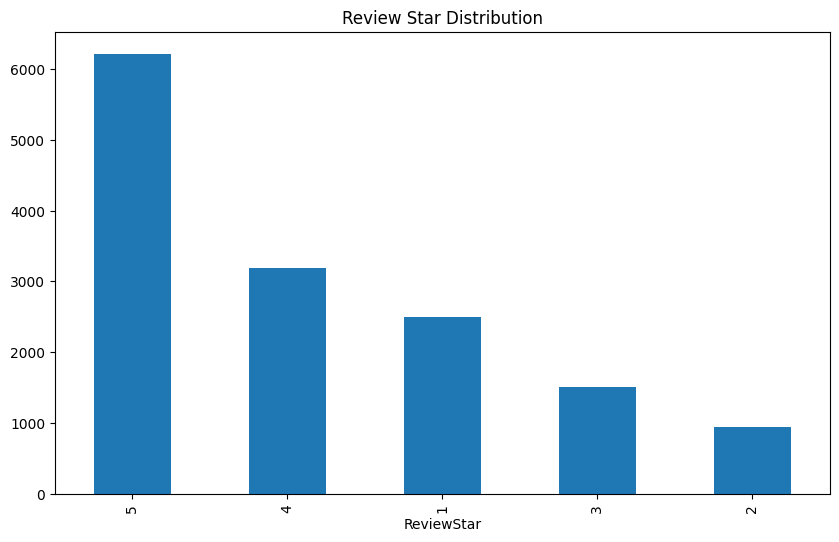

In [ ]:
print(f" The summary of the reviews are: {data['ReviewStar'].value_counts()}")
data['ReviewStar'].value_counts().plot(kind='bar', title='Review Star Distribution', figsize=(10, 6))

#Sentiment Analysis

In [ ]:
data.columns

Index(['ReviewTitle', 'ReviewBody', 'ReviewStar', 'Product'], dtype='object')

#Defining Keywords to filter reviews for each category using Dictionary

In [ ]:
# Define aspect keywords
keywords = {
    "fit/feel": ["fit", "fitting", "comfortable", "tight", "loose", "wearable"],
    "build_quality": ["quality", "durable", "broken", "sturdy", "damage", "build"],
    "battery/charging": ["charge", "charging", "charged", "charger", "battery", "power"]
}

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Function to identify relevant aspect(s) based on keywords
def identify_aspects(ReviewBody):
    aspects = []
    review_lower = ReviewBody.lower()
    for aspect, kws in keywords.items():
        if any(kw in review_lower for kw in kws):
            aspects.append(aspect)
    return aspects

In [ ]:
# Function to classify sentiment based on compound score
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# Process reviews
results = []
for _, row in data.iterrows():
    product = row['Product']
    review = row['ReviewBody']

 # Correct condition to check for missing values
    if pd.isnull(review):  # Skip if review is empty or NaN
        continue

    aspects = identify_aspects(review)
    sentiment_scores = analyzer.polarity_scores(review)
    sentiment_class = classify_sentiment(sentiment_scores["compound"])

    for aspect in aspects:
        results.append({
            "Product": product,
            "Review": review,
            "Aspect": aspect,
            "Sentiment": sentiment_class,
            "Compound Score": sentiment_scores["compound"]
        })

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.head()

,Product,Review,Aspect,Sentiment,Compound Score
0,boAt Rockerz 255,No doubt it has a great bass and to a great ex...,build_quality,Negative,-0.9435
1,boAt Rockerz 255,No doubt it has a great bass and to a great ex...,battery/charging,Negative,-0.9435
2,boAt Rockerz 255,"This earphones are unreliable, i bought it be...",build_quality,Negative,-0.5875
3,boAt Rockerz 255,"i bought itfor 999,I purchased it second time,...",fit/feel,Positive,0.5569
4,boAt Rockerz 255,"i bought itfor 999,I purchased it second time,...",build_quality,Positive,0.5569


# Performing Sentiment Analysis on ProductReview Body


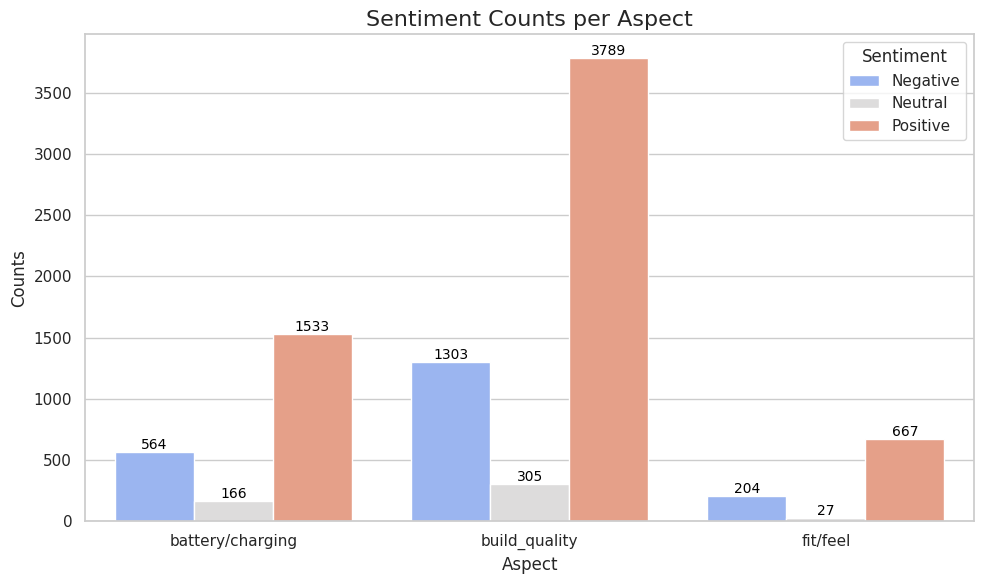

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Bar Plot: Sentiment counts per aspect
plt.figure(figsize=(10, 6))
sentiment_counts = results_df.groupby(['Aspect', 'Sentiment']).size().reset_index(name='Counts')

# Create the bar plot
ax = sns.barplot(data=sentiment_counts, x='Aspect', y='Counts', hue='Sentiment', palette='coolwarm')

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# Customize the chart
plt.title('Sentiment Counts per Aspect', fontsize=16)
plt.xlabel('Aspect', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

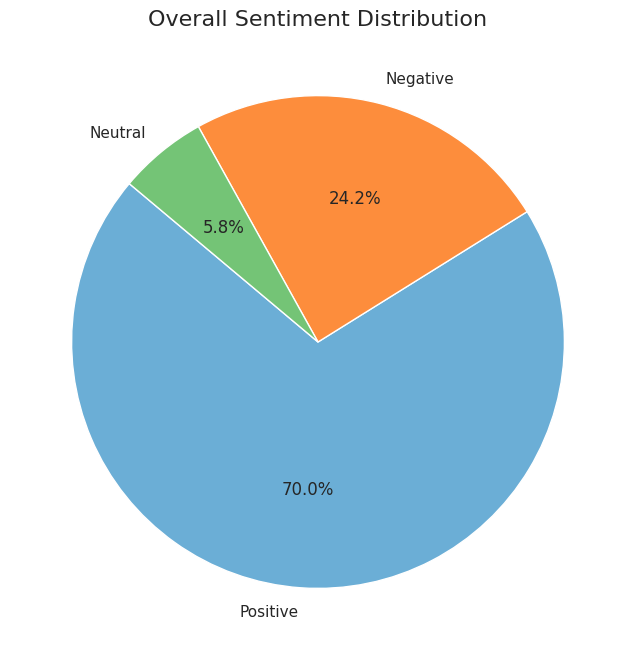

In [ ]:
# Pie Chart: Overall sentiment distribution
plt.figure(figsize=(8, 8))
overall_sentiment_counts = results_df['Sentiment'].value_counts()
plt.pie(overall_sentiment_counts, labels=overall_sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#6baed6', '#fd8d3c', '#74c476'])
plt.title('Overall Sentiment Distribution', fontsize=16)
plt.show()

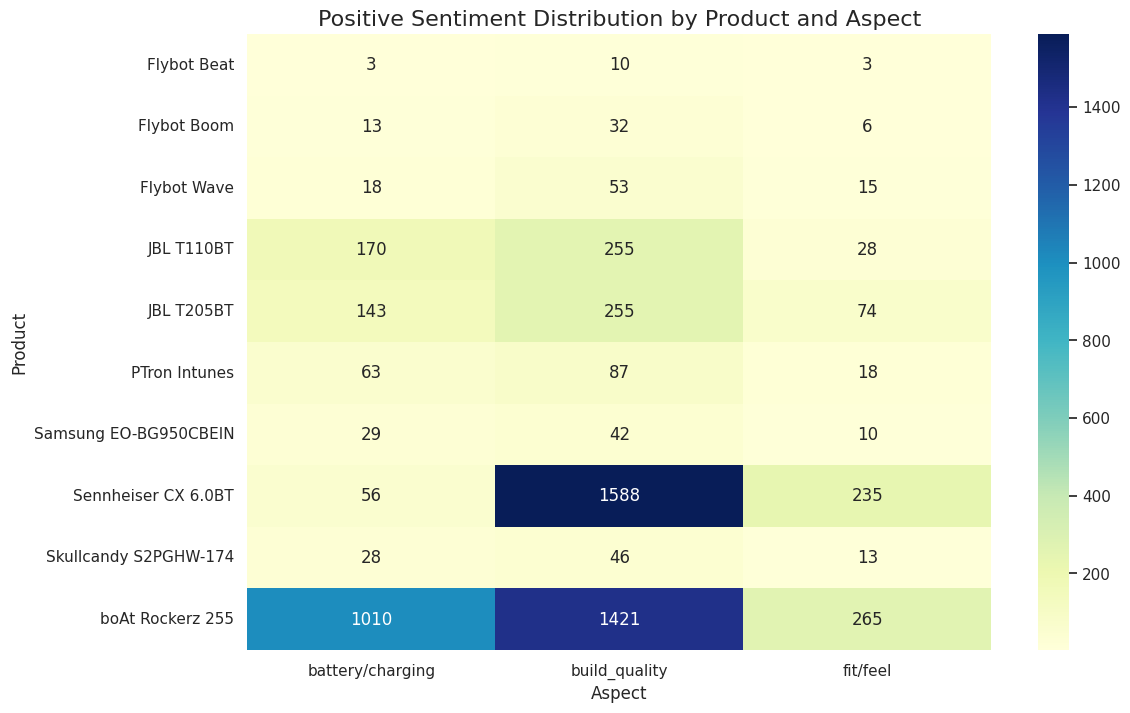

In [ ]:
# 3. Heatmap: Sentiment distribution by Product and Aspect
heatmap_data = results_df.groupby(['Product', 'Aspect', 'Sentiment']).size().unstack(fill_value=0).reset_index()
heatmap_data = heatmap_data.pivot(index='Product', columns='Aspect', values='Positive').fillna(0)  # Focus on 'Positive' counts
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Positive Sentiment Distribution by Product and Aspect', fontsize=16)
plt.xlabel('Aspect', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

In [ ]:
# Group by Product and Sentiment, then count occurrences
sentiment_counts = results_df.groupby(['Product', 'Sentiment']).size().reset_index(name='Counts')

# Create the interactive bar plot
fig = px.bar(
    sentiment_counts,
    x='Product',
    y='Counts',
    color='Sentiment',
    title='Sentiment Breakdown by Product',
    labels={'Counts': 'Number of Reviews'},
    color_discrete_map={'Positive': '#6baed6', 'Neutral': '#fd8d3c', 'Negative': '#74c476'},
    hover_data=['Counts']  # Display count on hover
)

# Customize the layout and increase chart size
fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Number of Reviews',
    legend_title='Sentiment',
    barmode='stack',  # Stacked bar chart
    template='plotly_white',  # Use a clean white background style
    width=1000,  # Set the width of the chart (in pixels)
    height=700   # Set the height of the chart (in pixels)
)

# Show the chart
fig.show()


In [ ]:
results_df.groupby(['Product']).count()

,Review,Aspect,Sentiment,Compound Score
Product,,,,
Flybot Beat,18,18,18,18
Flybot Boom,55,55,55,55
Flybot Wave,113,113,113,113
JBL T110BT,868,868,868,868
JBL T205BT,821,821,821,821
PTron Intunes,220,220,220,220
Samsung EO-BG950CBEIN,112,112,112,112
Sennheiser CX 6.0BT,2432,2432,2432,2432
Skullcandy S2PGHW-174,141,141,141,141


In [ ]:
# Company with most positive reviews
# Filter out only positive reviews

positive_reviews = results_df[results_df['Sentiment'] == 'Positive']

#Count positive reviews per company
positive_count = positive_reviews['Product'].value_counts()
print(positive_count)
# Count total reviews per company

Product
boAt Rockerz 255         2696
Sennheiser CX 6.0BT      1879
JBL T205BT                472
JBL T110BT                453
PTron Intunes             168
Skullcandy S2PGHW-174      87
Flybot Wave                86
Samsung EO-BG950CBEIN      81
Flybot Boom                51
Flybot Beat                16
Name: count, dtype: int64


In [ ]:
# Count the total number of reviews per product
total_count = results_df['Product'].value_counts()

# Calculate the ratio of positive reviews
positive_ratio = positive_count / total_count

# Sort the positive ratio in descending order
positive_ratio_sorted = positive_ratio.sort_values(ascending=False)

# Print the sorted positive ratio
print(positive_ratio_sorted)

Product
Flybot Boom              0.927273
Flybot Beat              0.888889
Sennheiser CX 6.0BT      0.772615
PTron Intunes            0.763636
Flybot Wave              0.761062
Samsung EO-BG950CBEIN    0.723214
boAt Rockerz 255         0.713605
Skullcandy S2PGHW-174    0.617021
JBL T205BT               0.574909
JBL T110BT               0.521889
Name: count, dtype: float64


# Word Cloud for the Reviews

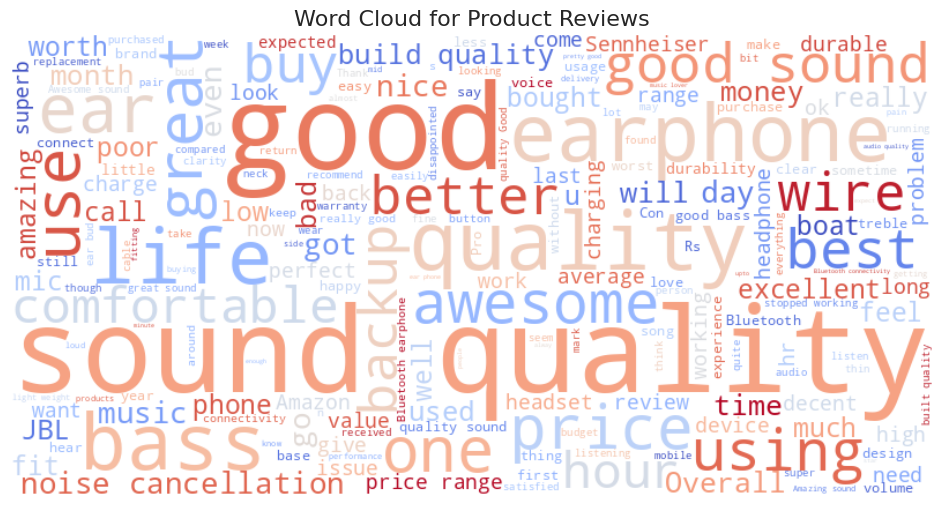

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all reviews into a single text string
all_reviews = " ".join(review for review in results_df['Review'])  # Assuming 'Review' column contains text

# Define stopwords (extend the default stopwords list)
stopwords = set(STOPWORDS)
stopwords.update(["product", "headphones", "earbuds", "wearable", "battery", "charger"])  # Add domain-specific stopwords

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="coolwarm").generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud for Product Reviews", fontsize=16)
plt.show()

# Word Cloud by Sentiments

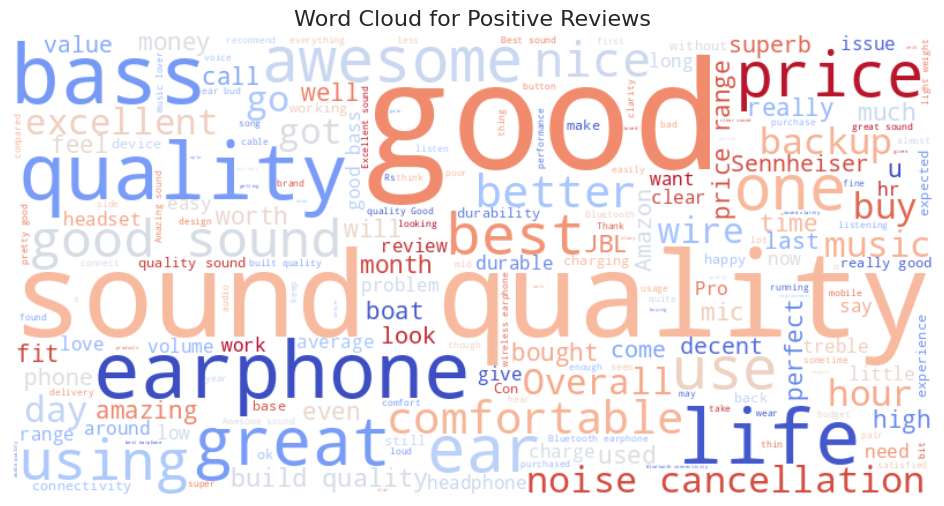

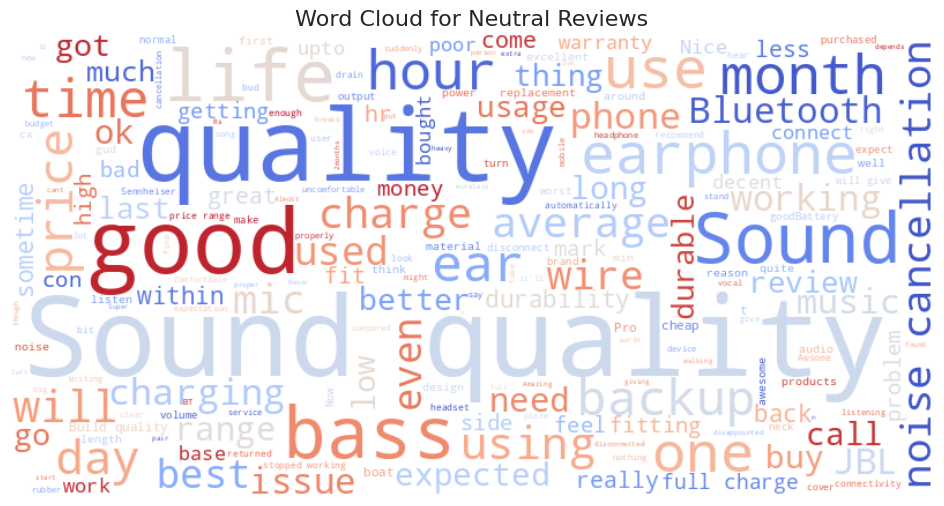

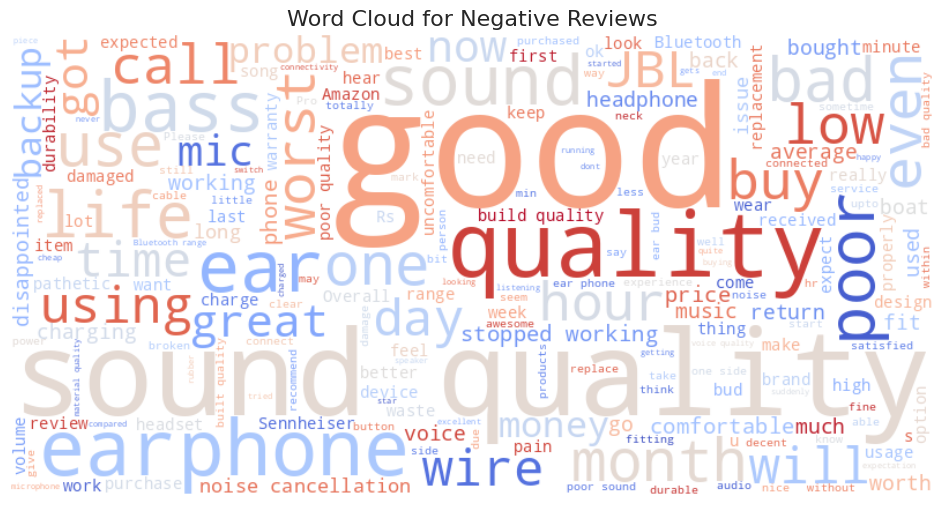

In [ ]:
# Generate word clouds by sentiment
for sentiment in ["Positive", "Neutral", "Negative"]:
    sentiment_reviews = " ".join(review for review in results_df[results_df['Sentiment'] == sentiment]['Review'])

    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="coolwarm").generate(sentiment_reviews)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Reviews", fontsize=16)
    plt.show()

# Word Count by Sentiments

In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords (common words to remove)
stop_words = set(stopwords.words("english"))
custom_stopwords = {"product", "headphones", "earbuds", "wearable", "battery", "charger"}  # Domain-specific stopwords
stop_words.update(custom_stopwords)

# Function to clean and tokenize text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()  # Tokenize by splitting at spaces
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Initialize dictionary to store word counts for each sentiment
word_counts_by_sentiment = {}

# Loop through each sentiment category and count words
for sentiment in ["Positive", "Neutral", "Negative"]:
    sentiment_reviews = " ".join(results_df[results_df['Sentiment'] == sentiment]['Review'])  # Join all reviews for that sentiment
    words = clean_text(sentiment_reviews)  # Clean and tokenize
    word_counts = Counter(words)  # Count word occurrences
    word_counts_by_sentiment[sentiment] = word_counts

# Convert word counts to DataFrame for better visualization
word_count_df = pd.DataFrame(word_counts_by_sentiment).fillna(0).astype(int)

# Display the top 10 most common words for each sentiment
print(word_count_df.head(10))  # Shows the top 10 most frequent words across sentiments


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


           Positive  Neutral  Negative
bought          301       12        94
itfor             4        0         0
999i              3        0         0
purchased        92        8        42
second           42        1        17
time            441       38       137
gifted           13        0         1
first           179        5        58
one             883       46       295
brother          10        0         0


In [ ]:
# Extract the most frequent word and its count for each sentiment
highest_word_counts = {sentiment: word_counts.most_common(1)[0] for sentiment, word_counts in word_counts_by_sentiment.items()}

# Convert to a DataFrame
highest_word_df = pd.DataFrame(highest_word_counts).T  # Transpose for readability
highest_word_df.columns = ["Word", "Count"]  # Assign correct column names

# Display the result
print(highest_word_df)

             Word Count
Positive  quality  5703
Neutral   quality   370
Negative  quality  1654


# Extracting Highest Count of Words used in the Product Review

In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords (common words to remove)
stop_words = set(stopwords.words("english"))
custom_stopwords = {"product", "headphones", "earbuds", "wearable", "battery", "charger"}  # Domain-specific stopwords
stop_words.update(custom_stopwords)

# Function to clean and tokenize text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()  # Tokenize by splitting at spaces
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Combine all reviews into a single text string
all_reviews_text = " ".join(results_df['Review'])  # Assuming 'Review' column contains text

# Tokenize and clean text
word_list = clean_text(all_reviews_text)

# Count word occurrences
word_counts = Counter(word_list)

# Convert to DataFrame for better visualization
word_count_df = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Count"])  # Get top 10 words

# Display the most frequent words
print(word_count_df)

        Word  Count
0    quality   7727
1      sound   6112
2       good   5988
3       bass   2272
4       life   1507
5  earphones   1349
6      price   1302
7       also   1298
8        one   1224
9      great   1104


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Bar Chart Showing the Highest Count of Words used in the Product Review

<ipython-input-29-bcd9f48e4108>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




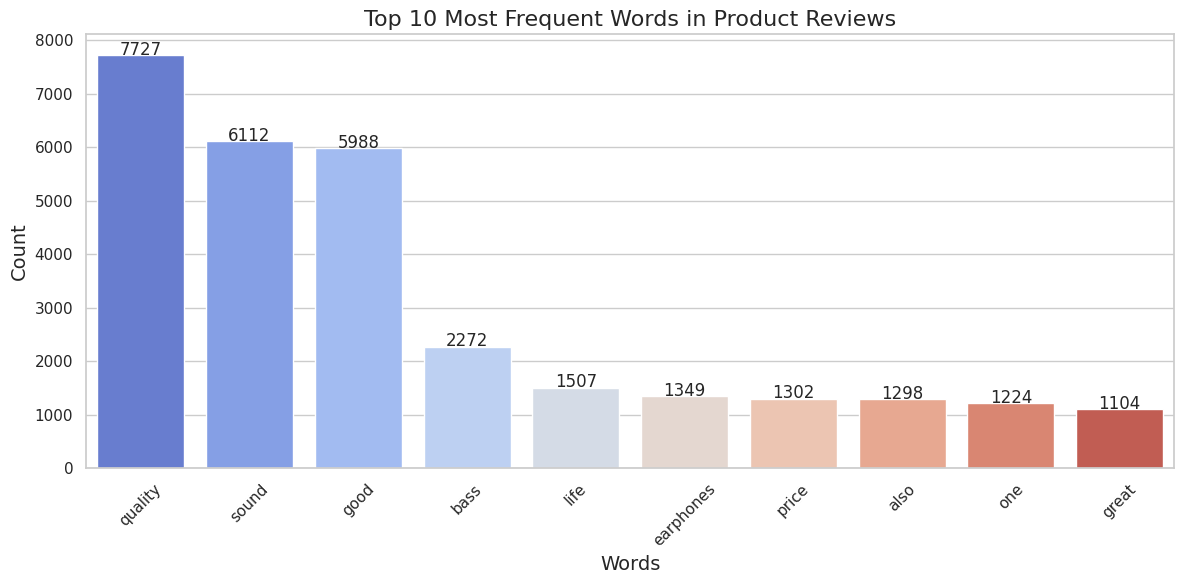

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the word frequency as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=word_count_df, x="Word", y="Count", palette="coolwarm")

# Add labels to bars
for index, value in enumerate(word_count_df["Count"]):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)  # Adjust label position

# Customize chart
plt.title("Top 10 Most Frequent Words in Product Reviews", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Key Insights

1. 3 out of the top 5 products with highest positive review ratio had below 100 reviews, while Sennheiser and PTron had 1,879 and 168 reviews. Overall all the company products had an appreciable positive review but they need to work more on customer complaints for the two JBL products.(as displayed above)

2. About 70% of the company's total reviews are positive which is a good one but invariably it makes our data distribution bias (Overall Sentiment Distribution chart)

3. Overall across all product lines , the company receive more positive reviews on Build Quality aspect, while the least positive reviews come from Fit/feel aspect. While they need to work more on addressing the Fit?feel challenges, they can consiolidate on the positive goodwillof Build Quality aspect. (See Postive Sentiment Distribution chart for detailed analysis)

4. Fit/Feel had the highest Postive to Negative Review ratio (See Sentiment Count per Aspect chart)

5. The company product review show that it received over 40% 5-star review out of its total rating (Review Star Disribution chart)